### Dataset Information

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

In [8]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
  
# fetch dataset 
data = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = data.data.features 
y = data.data.targets 

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)
  
# metadata 
print(data.metadata) 
  
# variable information 
print(data.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [11]:
# Display the first 5 rows of the dataset
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


<Axes: xlabel='Diagnosis', ylabel='count'>

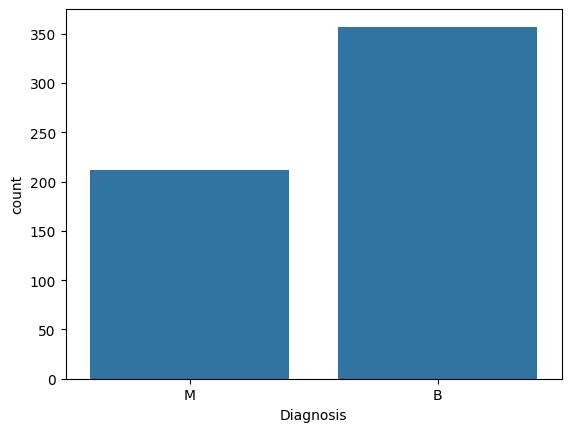

In [ ]:
import seaborn as sns

# Show distribution of target variable "Diagnosis"
sns.countplot(data=df, x="Diagnosis")

In [18]:
# convert the target variable to binary
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

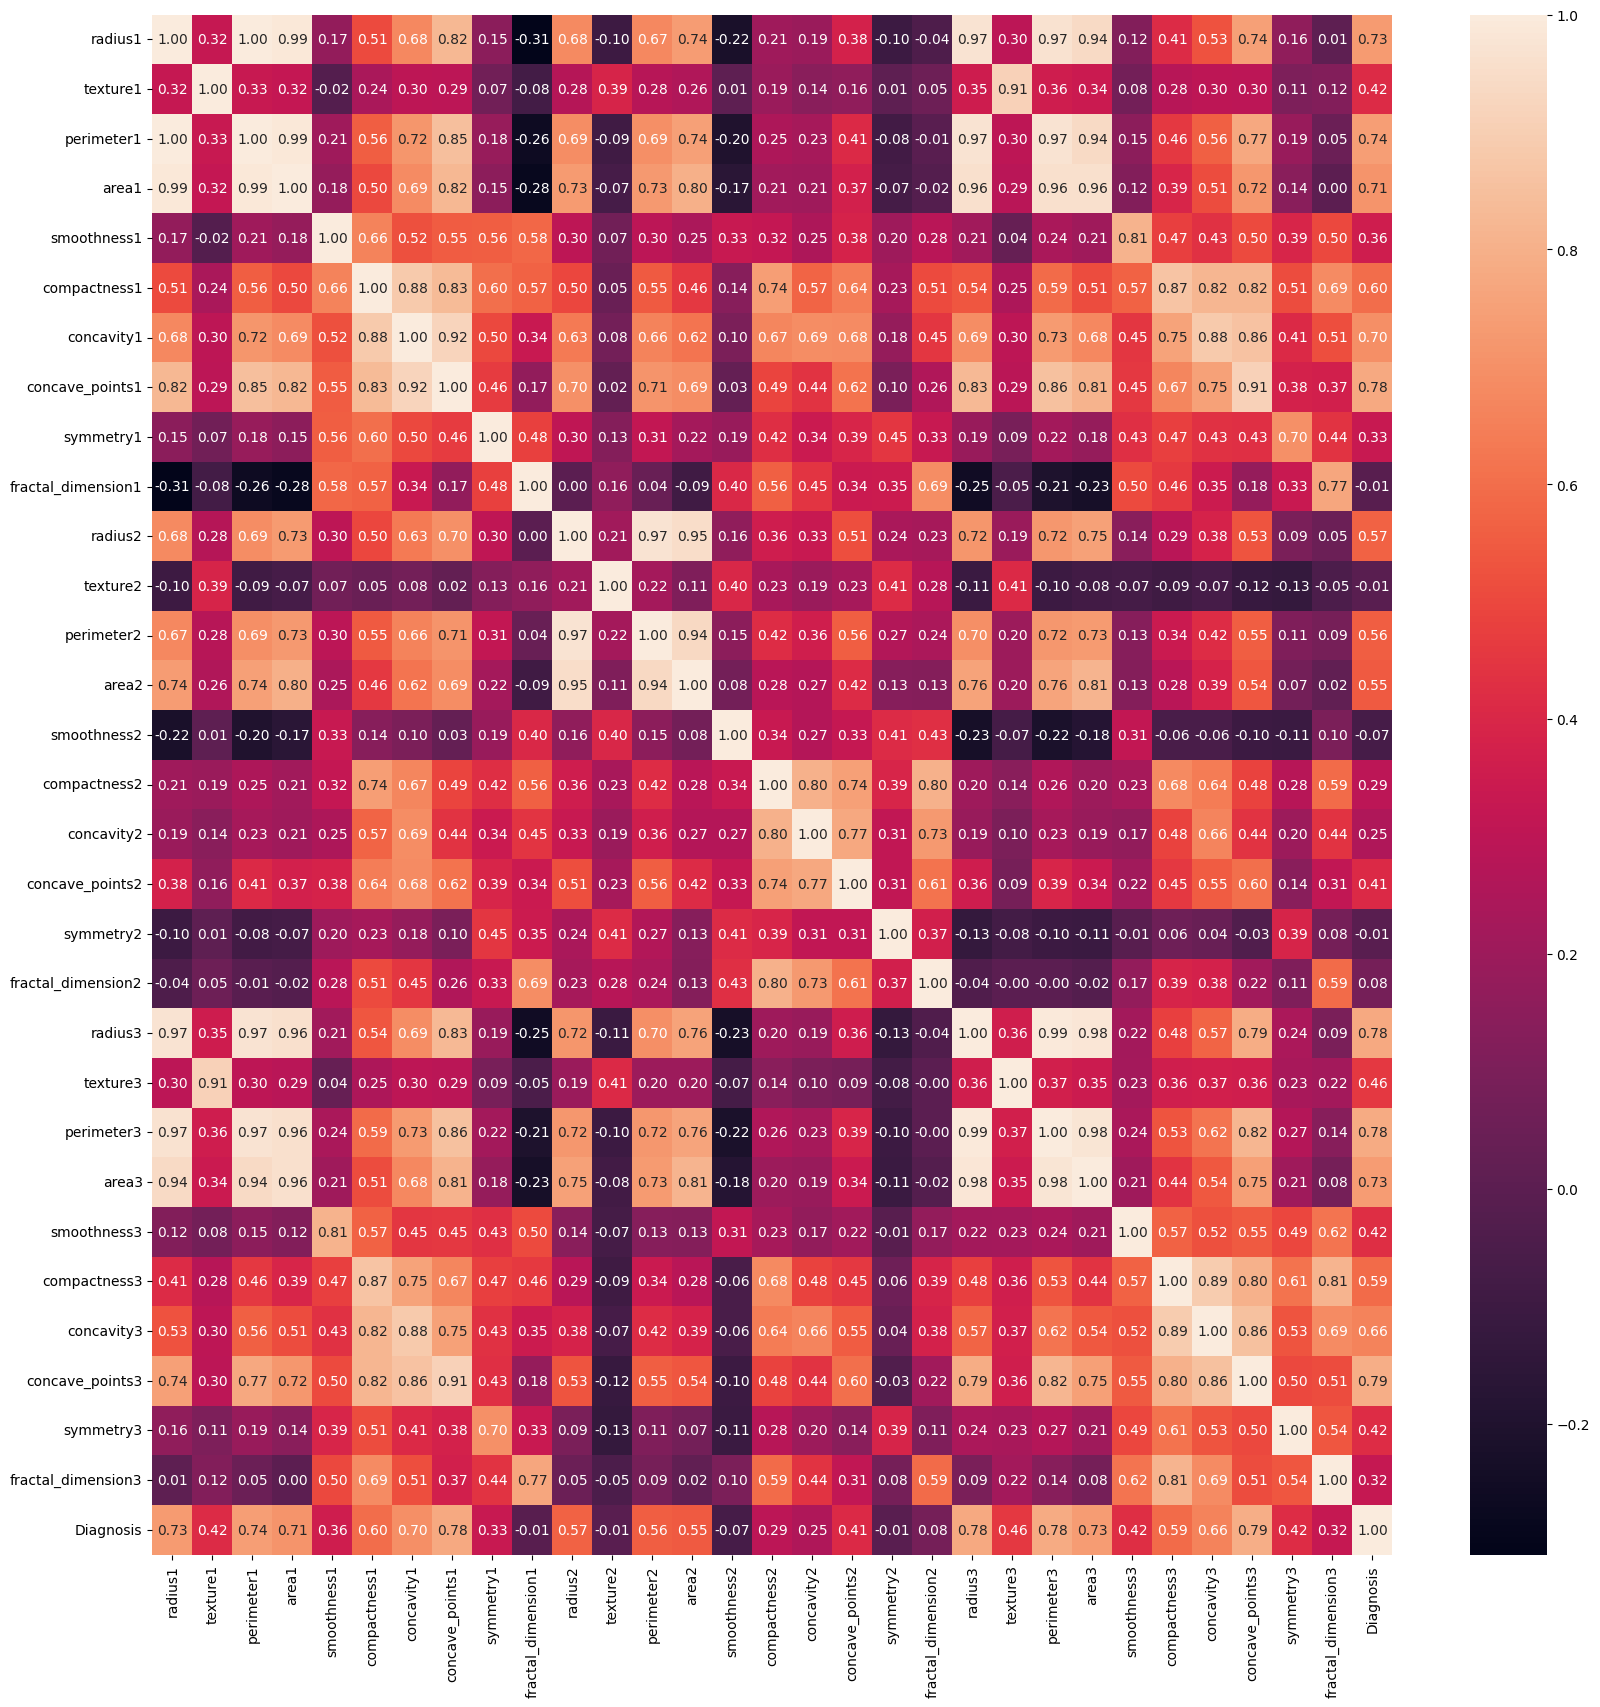

In [ ]:
# This function will display the correlation matrix of the dataset
def print_corr_matrix(df):
    correlation_matrix = df.corr()

    # Display the correlation matrix as a graph using seaborn
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
    plt.show()

print_corr_matrix(df)

### Point-Biserial Correlations

The point-biserial correlation is a measure of the strength and direction of the association that exists between one continuous variable and one binary variable. It is a special case of the Pearson correlation coefficient, which is used when one of the variables is dichotomous (binary) and the other is continuous.

In [40]:
import pandas as pd
from scipy.stats import pointbiserialr

# this function calculates the point-biserial correlation between the target column and all other columns
def point_biserial_correlation(df, target_column, threshold):

    # Calculate point-biserial correlation
    correlations = {}
    for column in df.columns:
        if column != target_column:
            correlations[column] = round(pointbiserialr(df[target_column], df[column])[0], 2)

    # Print correlations
    print("Correlation with Diagnosis:")
    for feature, corr in correlations.items():
        print(f"{feature}: {corr}")

    # Apply threshold
    selected_features = [feature for feature, corr in correlations.items() if abs(corr) >= threshold]
    print(f"Selected features: {selected_features}")

    # Drop columns that are not selected and return the new DataFrame
    df_filtered = df[selected_features].copy()

    # Add the target column to the new DataFrame
    df_filtered.loc[:, target_column] = df[target_column]
    return df_filtered

# Select features with a correlation of at least 0.3
df_filtered = point_biserial_correlation(df, 'Diagnosis', 0.3)
df_filtered.info()

Correlation with Diagnosis:
radius1: 0.73
texture1: 0.42
perimeter1: 0.74
area1: 0.71
smoothness1: 0.36
compactness1: 0.6
concavity1: 0.7
concave_points1: 0.78
symmetry1: 0.33
fractal_dimension1: -0.01
radius2: 0.57
texture2: -0.01
perimeter2: 0.56
area2: 0.55
smoothness2: -0.07
compactness2: 0.29
concavity2: 0.25
concave_points2: 0.41
symmetry2: -0.01
fractal_dimension2: 0.08
radius3: 0.78
texture3: 0.46
perimeter3: 0.78
area3: 0.73
smoothness3: 0.42
compactness3: 0.59
concavity3: 0.66
concave_points3: 0.79
symmetry3: 0.42
fractal_dimension3: 0.32
Selected features: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'radius2', 'perimeter2', 'area2', 'concave_points2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):

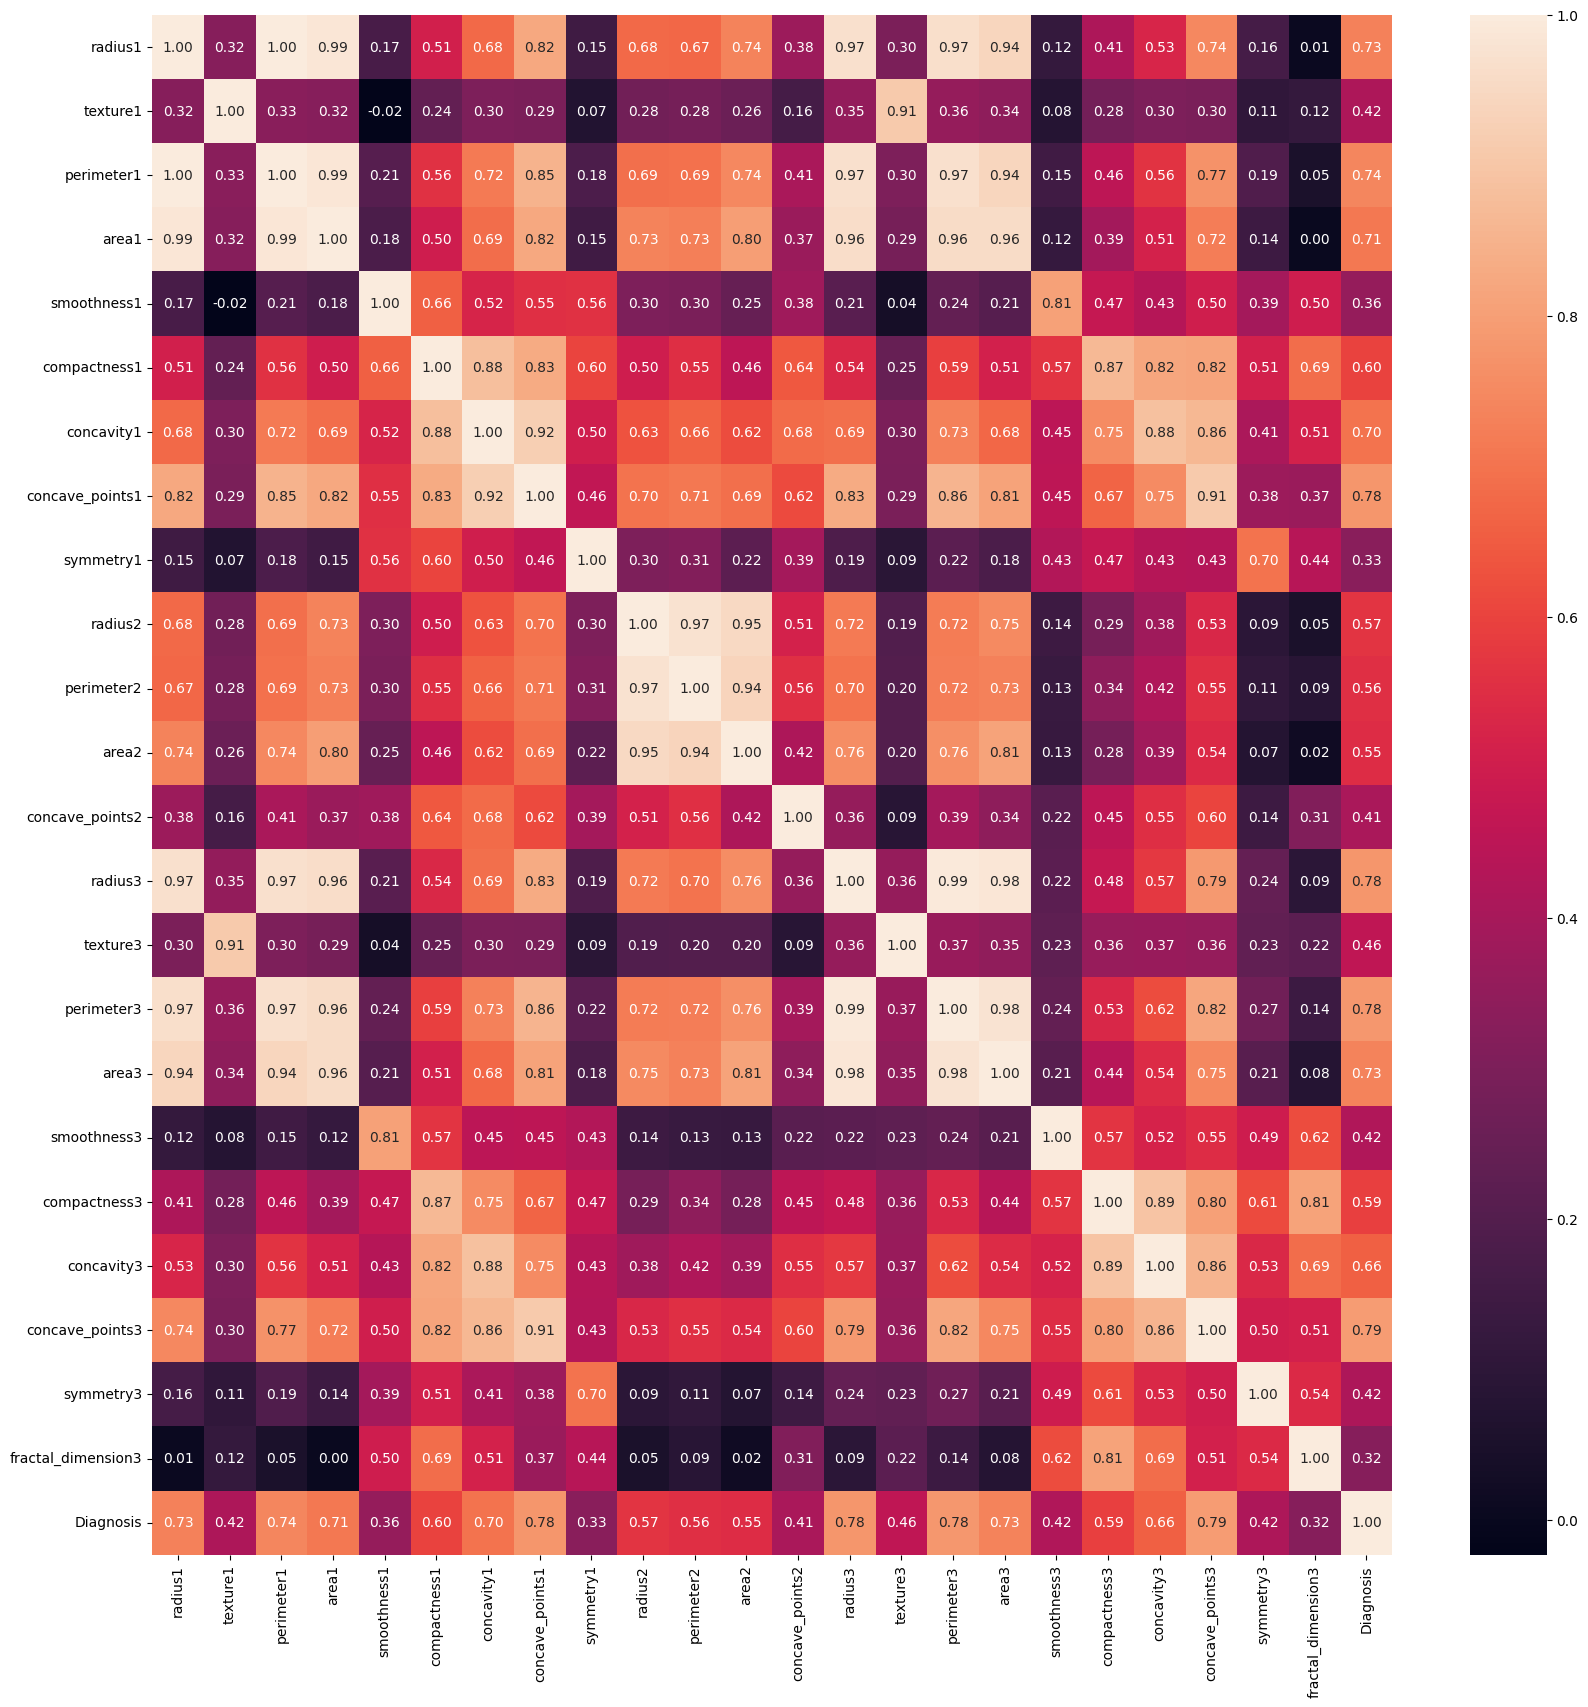

In [41]:
print_corr_matrix(df_filtered)